Complete the exercises below For **Assignment #2**.

First, load the `Tidyverse` package which imports data visualization and wrangling libraries that we need.

In [1]:
# uncomment the code below and execute this cell
library('tidyverse')

Warning message:
“Your system is mis-configured: ‘/var/db/timezone/localtime’ is not a symlink”
Warning message:
“‘/var/db/timezone/localtime’ is not identical to any known timezone file”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


If you are unable to load the `Tidyverse` package, you may not have it installed. Please refer to the assignment `README` for instructions to update your `data730` environment to include the `Tidyverse` package.

## Data visualization

Let's work with the [Palmer Penguins data](https://allisonhorst.github.io/palmerpenguins/).

In [5]:
# uncomment the code below and execute this cell
library('palmerpenguins')
glimpse(penguins)


Rows: 344
Columns: 8
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, NA, 36.7, 39.3, 38.9, 39.2, 34.1, …
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, NA, 19.3, 20.6, 17.8, 19.6, 18.1, …
$ flipper_length_mm <int> 181, 186, 195, NA, 193, 190, 181, 195, 193, 190, 186…
$ body_mass_g       <int> 3750, 3800, 3250, NA, 3450, 3650, 3625, 4675, 3475, …
$ sex               <fct> male, female, female, NA, female, male, female, male…
$ year              <int> 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007…


We now have a data frame called `penguins` available. Use this table for the following exercises.

### Bar chart

In the cell below make a bar chart that shows how many penguins are in the data from each island. Encode the penguin species as the `fill` attribute of the bars.

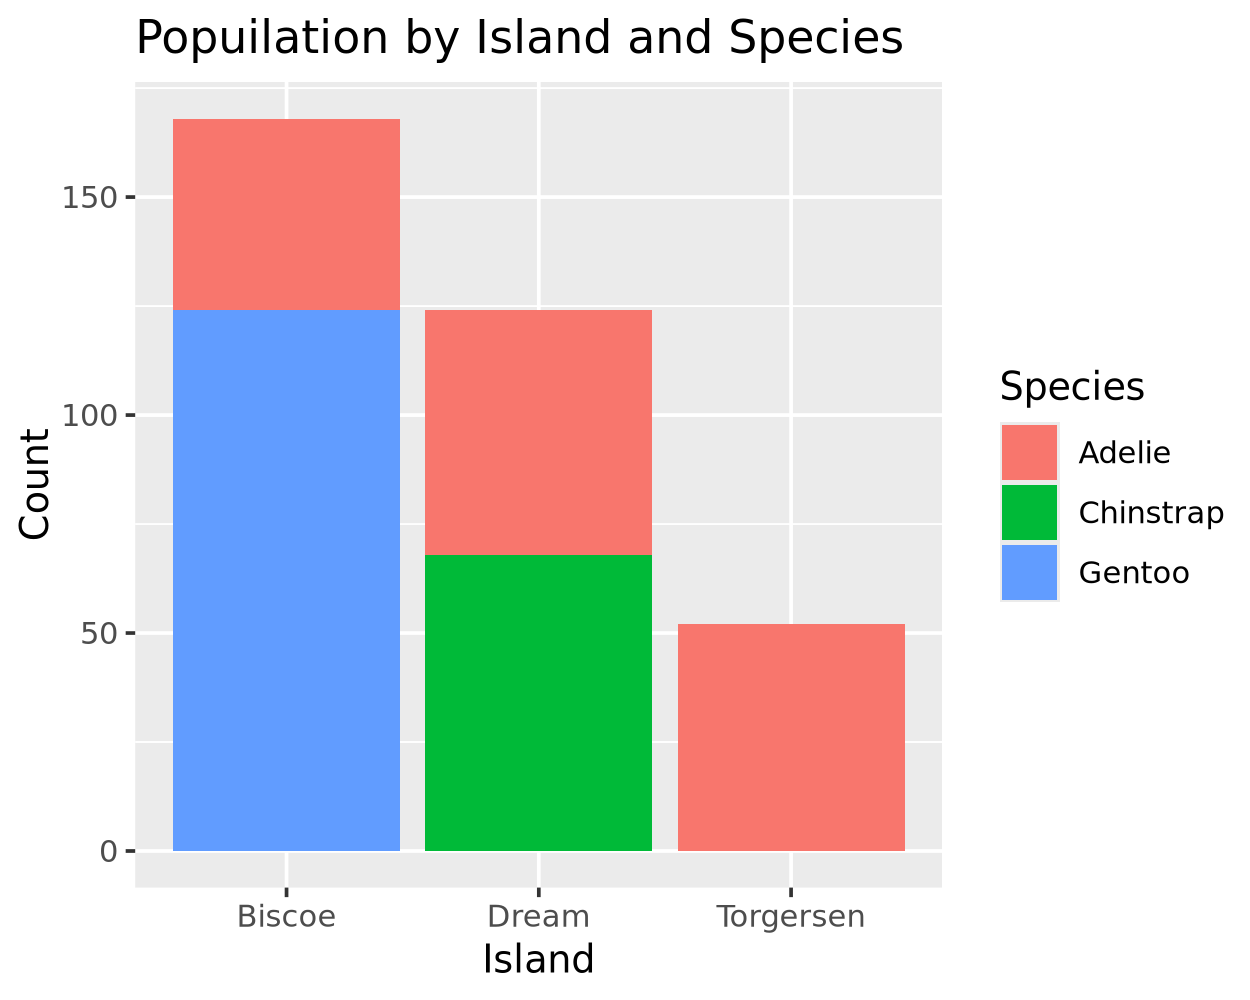

In [37]:
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar() +
  labs(
    title = "Popuilation by Island and Species",
    x = "Island",
    y = "Count",
    fill = "Species"
  )

**In which islands were *Adelie* penguins observed?** Answer using a [markdown list](https://www.markdownguide.org/basic-syntax/#lists-1) in the cell below. 

⚠️ Remember to switch the cell type to `Markdown`.

Islands
- Biscoe
- Dream Island
- Torgersen

### Scatter chart

Make a scatter chart of bill depth versus bill length. Color the points by penguin species. Add a `scale` modification to your chart to adjust the color palette (e.g. add `scale_color_brewer(palette = "Set2")`).

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


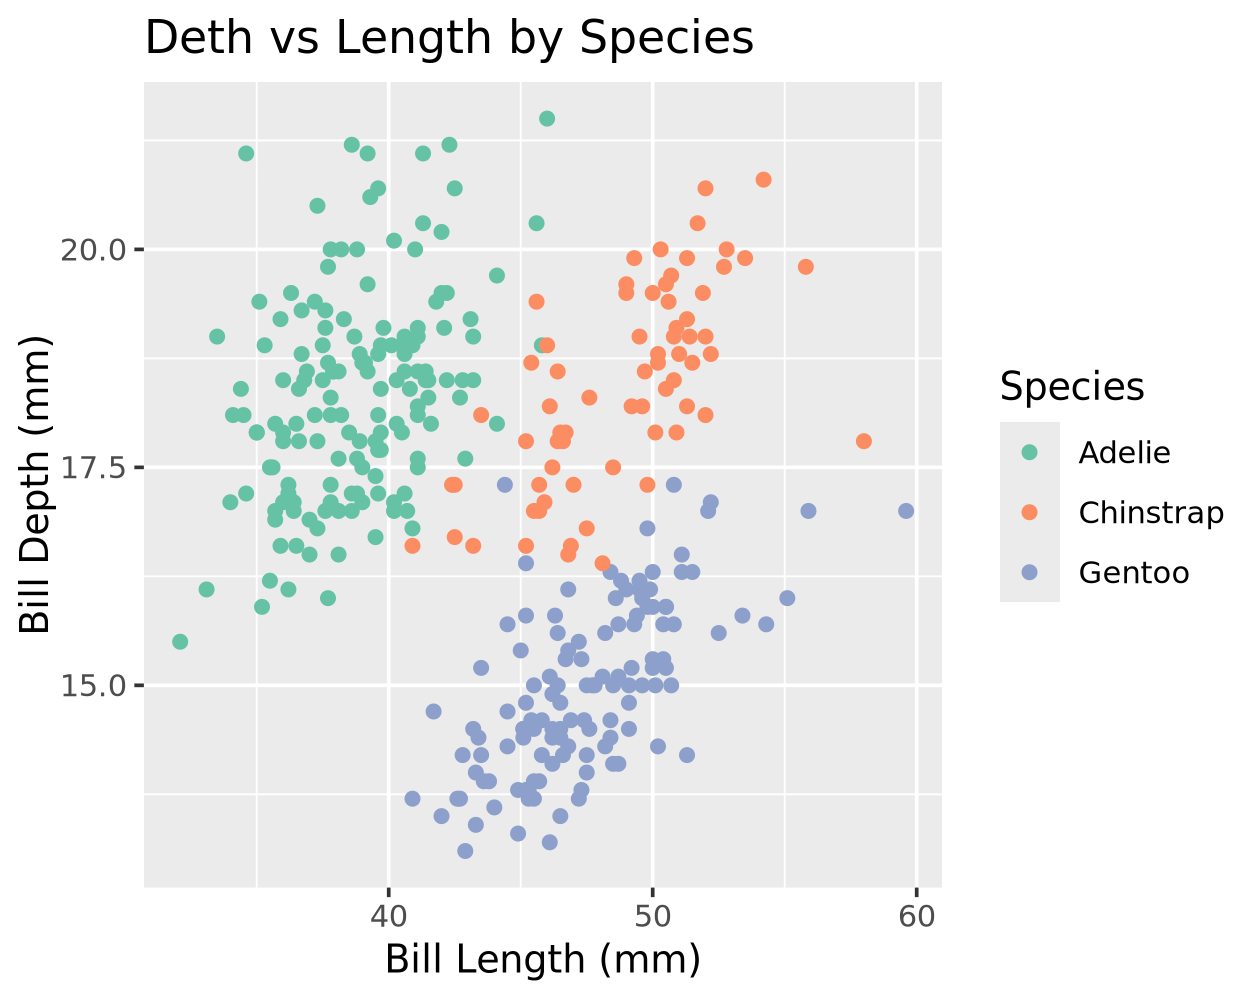

In [8]:
ggplot(penguins, aes(x = bill_length_mm, y = bill_depth_mm, color = species)) +
  geom_point() +
  scale_color_brewer(palette = "Set2") +
  labs(
    title = "Deth vs Length by Species",
    x = "Bill Length (mm)",
    y = "Bill Depth (mm)",
    color = "Species"
  )


### Histogram

Make a histogram of penguin body mass. 
- Facet your chart by the `sex` column using the `facet_wrap` function and setting the `ncol` parameter to `1`.
- In your `geom_histogram` layer, set the `position` argument to `"identity"` and set `alpha`to a value between `0` and `1`.
- Map penguin species to the `fill` property.
- Adjust the `fill` scale palette similarly to how we adjusted the `color` scale palette above. I.e. change to the [ColorBrewer](https://colorbrewer2.org/) `"Set2"` palette.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


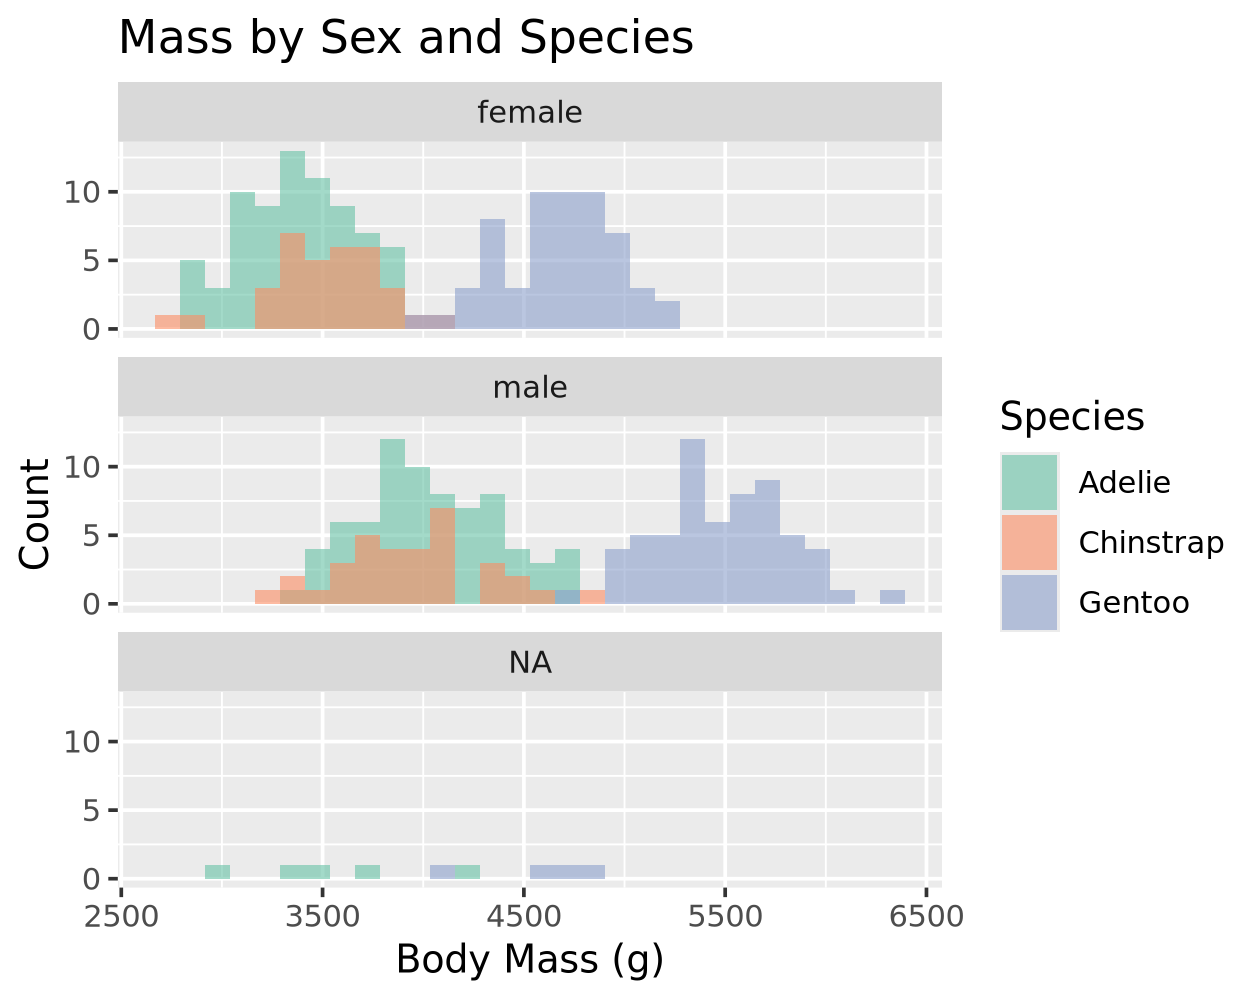

In [18]:
ggplot(penguins, aes(x = body_mass_g, fill = species)) +
  geom_histogram(
    position = "identity", 
    alpha = 0.6
  ) +
  facet_wrap(~sex, ncol = 1) +
  scale_fill_brewer(palette = "Set2") +
  labs(
    title = "Mass by Sex and Species",
    x = "Body Mass (g)",
    y = "Count",
    fill = "Species"
  ) 

What happens when you don't have `position = "identity"` in your `geom_histogram` layer? Answer below in a `Markdown` cell.

You can no longer easily compare the distribution of body mass across thespecies feature within each bar. Using the identity parameter allows us to overlay the bars, making each groups bars visible.

## Data wrangling

First we are going to bring in a data set to practice with called `txhousing`. You can find some information about `txhousing` [here](https://ggplot2.tidyverse.org/reference/txhousing.html).

In [27]:
# uncomment the next two lines and execute this cell
data(txhousing)
glimpse(txhousing)

Rows: 8,602
Columns: 9
$ city      <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abil…
$ year      <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, …
$ volume    <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 1263…
$ median    <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 6450…
$ listings  <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, …
$ inventory <dbl> 6.3, 6.6, 6.8, 6.9, 6.8, 6.6, 6.2, 6.4, 6.5, 6.6, 6.2, 5.7, …
$ date      <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, …


Write a code chunk to remove the inventory variable. Save the results in a data frame called `txhousing`. Use `glimpse` or `head` to confirm you have removed the variable.

In [28]:
txhousing = txhousing |> select(-inventory)
glimpse(txhousing)

Rows: 8,602
Columns: 8
$ city     <chr> "Abilene", "Abilene", "Abilene", "Abilene", "Abilene", "Abile…
$ year     <int> 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 72, 98, 130, 98, 141, 156, 152, 131, 104, 101, 100, 92, 75, 1…
$ volume   <dbl> 5380000, 6505000, 9285000, 9730000, 10590000, 13910000, 12635…
$ median   <dbl> 71400, 58700, 58100, 68600, 67300, 66900, 73500, 75000, 64500…
$ listings <dbl> 701, 746, 784, 785, 794, 780, 742, 765, 771, 764, 721, 658, 7…
$ date     <dbl> 2000.000, 2000.083, 2000.167, 2000.250, 2000.333, 2000.417, 2…


Make a data set called `dallas_sub` that includes data only from the city of Dallas in 2012 & 2013.

In [29]:
dallas_sub = txhousing |> filter(city == "Dallas" & year %in% c(2012, 2013))

glimpse(dallas_sub)

Rows: 24
Columns: 8
$ city     <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "…
$ year     <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2…
$ month    <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8…
$ sales    <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, 3…
$ volume   <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 12090…
$ median   <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 17420…
$ listings <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 15994…
$ date     <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, 2…


Add a column to the `dallas_sub` data set called `prct_sold` that calculates the percentage of listings that were sold (`sales/listings * 100`). Be sure to save the results also as a data frame called `dallas_sub`.

In [30]:
dallas_sub = dallas_sub |> mutate(prct_sold = (sales / listings) * 100)

glimpse(dallas_sub)

Rows: 24
Columns: 9
$ city      <chr> "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", "Dallas", …
$ year      <int> 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2012, …
$ month     <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, …
$ sales     <dbl> 2555, 3085, 4068, 4291, 5004, 5196, 4859, 5264, 4151, 4214, …
$ volume    <dbl> 509458081, 634067291, 898320563, 983333297, 1175419749, 1209…
$ median    <dbl> 150800, 157100, 167300, 168700, 175100, 177900, 176000, 1742…
$ listings  <dbl> 16721, 17173, 17433, 17632, 17726, 17587, 17314, 16611, 1599…
$ date      <dbl> 2012.000, 2012.083, 2012.167, 2012.250, 2012.333, 2012.417, …
$ prct_sold <dbl> 15.28019, 17.96425, 23.33505, 24.33643, 28.22972, 29.54455, …


Calculate the average percentage of listings that were sold in Dallas in each month of the year based on your `dallas_sub` data set. Save the results of the calculation in an data frame called `dallas_summary`.

In [33]:

dallas_sub = dallas_sub |> mutate(prct_sold = (sales / listings) * 100)
dallas_summary = dallas_sub |> group_by(month) |> summarize(avg_prct_sold = mean(prct_sold, na.rm = TRUE))
glimpse(dallas_summary)


Rows: 12
Columns: 2
$ month         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ avg_prct_sold <dbl> 20.54462, 23.47328, 32.24472, 34.46954, 38.20168, 37.191…


Use `slice_max` to see the top 3 months with the greatest average percentage of listings sold from `dallas_summary`. You do not need to save the results.

In [34]:
dallas_summary |> slice_max(avg_prct_sold, n = 3)
glimpse(dallas_summary)


month,avg_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


Rows: 12
Columns: 2
$ month         <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12
$ avg_prct_sold <dbl> 20.54462, 23.47328, 32.24472, 34.46954, 38.20168, 37.191…


Run the following code chunk. Study the code, and the output. Explain in your own words what this code chunk calculated.

In [36]:
txhousing |>
  filter(year == 2012 | year == 2013, city == "Dallas") |>
  mutate(prct_sold = sales/listings *100) |>
  group_by(month) |>
  summarize(mean_prct_sold = mean(prct_sold)) |>
  slice_max(mean_prct_sold, n = 3)

month,mean_prct_sold
<int>,<dbl>
8,38.51543
5,38.20168
6,37.19150


The code above takes in our original txhousing dataset and transforms it to show the top 3 months, based on percentage of listings for houses in Dallas between 2012 and 2013.